# Plot Overview of BTs

Very close to the stuff for Aiko.

In [65]:
%matplotlib inline

import glob, os
import numpy as np
import pylab as pl
import xarray as xr
import datetime

#import seaborn as sns
#sns.set_context( 'talk' )


pl.rcParams['figure.figsize'] = (16.0, 12.0)
pl.rcParams['font.size'] = 16.0


In [46]:
import nawdex_analysis.io.input_lev2 as input_lev2
from tropy.standard_config import local_data_path
import tropy.plotting_tools.colormaps

## Subsampling for Speedup

In [47]:
def subsamp2d( d, nsub = 4 ):
    
    dsub = {}
    for k in d.keys():
        
        v = d[k]

        try:
            if np.ndim(v) == 2:
                vsub = v[::nsub, ::nsub]
        except:
            vsub = v
            print '%s not an 2d array?' % k
            
        dsub[k] = vsub
        
    return dsub
        

## Make a Filelist

In [48]:
version = 'v2019-10-18'
version = 'v2020-02-13'


In [49]:
# old path
fdir = '%s/icon/hdcp2_atlantic_stochconv_main_experiments' % local_data_path

In [50]:
# new path
fdir = '%s/icon/stoch_exp_%s' % (local_data_path, version )

In [51]:
flist = sorted( glob.glob( '%s/[sm]*-hdcp2_atlantic*nc' % fdir) )

In [52]:
for i, fname in enumerate( flist ):
    print(i, fname )

(0, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-02-13/msevi-hdcp2_atlantic-20131220.nc')
(1, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-02-13/synsat-hdcp2_atlantic_detconv.nc')
(2, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-02-13/synsat-hdcp2_atlantic_noconv.nc')
(3, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-02-13/synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc')
(4, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-02-13/synsat-hdcp2_atlantic_stochconv_vervel_-00.nc')


## Input BTs

In [53]:
time = datetime.datetime(2013, 12, 20, 16, 0)

b108stack = {}
b062stack = {}

for fname in flist:
        basename = os.path.basename( fname )
        b108stack[basename] = input_lev2.read_data_field( fname, time, 'bt108')
        b062stack[basename] = input_lev2.read_data_field( fname, time, 'bt062')


.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5


## Reset Mask

In [54]:
o = np.ones_like( b108stack[basename]['lon'] ).astype(np.bool)
for basename in b108stack.keys():
    b108stack[basename]['mask'] = o
    b062stack[basename]['mask'] = o


### Sort Exp a bit

In [55]:
if version == 'v2019-10-18':
    ilist = [0, 2, 1, 5, 6 ]
elif version == 'v2020-02-13':
    ilist = [0, 2, 1, 3, 4]

sorted_fnames = np.array(sorted( b108stack ))[ilist]

In [56]:
sorted_fnames

array(['msevi-hdcp2_atlantic-20131220.nc',
       'synsat-hdcp2_atlantic_noconv.nc',
       'synsat-hdcp2_atlantic_detconv.nc',
       'synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc',
       'synsat-hdcp2_atlantic_stochconv_vervel_-00.nc'], dtype='|S56')

In [57]:
labels = ['SEVIRI', 'NOCONV', 'D-OPER', 'S-DFLT', 'S-CPLN']

### Subsampling

In [58]:
if True:
    for fname in sorted_fnames:
#        b108stack[fname] = subsamp2d( b108stack[fname], nsub = 6 )
#        b062stack[fname] = subsamp2d( b062stack[fname], nsub = 6 )
        b108stack[fname] = subsamp2d( b108stack[fname], nsub = 4 )
        b062stack[fname] = subsamp2d( b062stack[fname], nsub = 4 )
    

In [59]:
for fname in sorted_fnames:
    for fname2 in sorted_fnames:
        print fname, fname2, (b108stack[fname]['bt108'] - b108stack[fname2]['bt108']).std()
        
    print 

msevi-hdcp2_atlantic-20131220.nc msevi-hdcp2_atlantic-20131220.nc 0.0
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_noconv.nc 14.295772661163872
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_detconv.nc 14.277572831288085
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc 15.33037210962599
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_stochconv_vervel_-00.nc 15.105576419945386

synsat-hdcp2_atlantic_noconv.nc msevi-hdcp2_atlantic-20131220.nc 14.295772661163872
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_noconv.nc 0.0
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_detconv.nc 6.454584405836212
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc 12.984778506806514
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_stochconv_vervel_-00.nc 12.275016525624471

synsat-hdcp2_atlantic_detconv.nc msevi-hdcp2_atlantic-20131220.nc 14.277572831288085
synsat-hdcp2_atlantic_detcon

## Plot BT Matrix

### Patch the nawdextools

In [60]:
import nawdex_analysis.plot.nawdex_map
from tropy.plotting_tools.bmaps import narval_map


In [61]:
from tropy.plotting_tools.bmaps import Basemap
def nawdex_map( region = 'narval' , color = 'black'):
    
    '''
    Draws a map in cylindric projection.

    
    Parameters
    ----------
    region : str, optional, default = 'zenith75'
         region selection

         possible arguments:
         'max-extent' : full NAWDEX simulations region
         'zenith75' : cutout of the NAWDEX region where zenith_angle < 75 degree fits in
         'atlantic' : cutout of the North Atlantic

    color : str, optional, default = 'black'
         color of the coastlines and country borders
    '''

    m = Basemap(projection='mill',
                     llcrnrlat = -10,
                     urcrnrlat = 20,
                     llcrnrlon = -65,
                     urcrnrlon = 15,
                     resolution='i')
    
    m.drawcoastlines(color = color)
    m.drawcountries(color = color)
    
    return m

nawdex_analysis.plot.nawdex_map.nawdex_map = nawdex_map


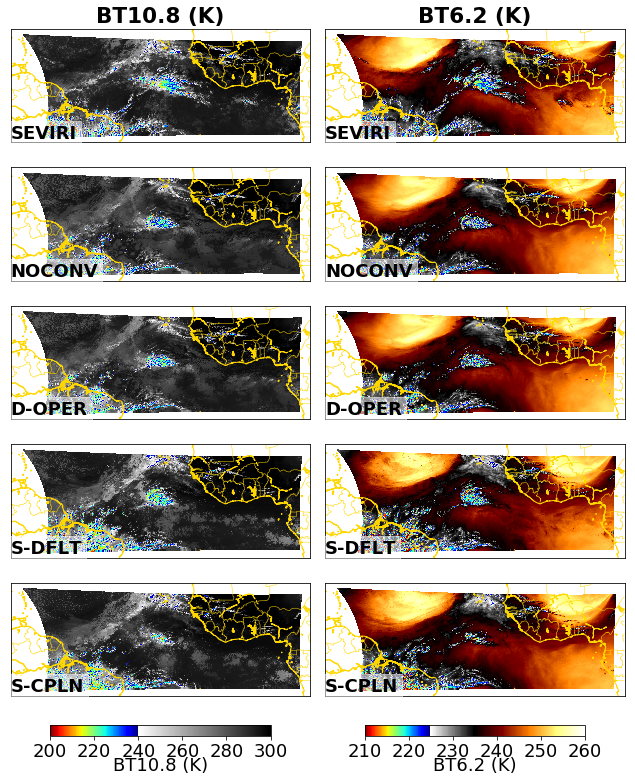

In [62]:
fig, axs = pl.subplots( nrows = len(sorted_fnames), ncols = 2, figsize = (11,14), sharex = True, sharey = True )

labs = labels

for i, basename in enumerate( sorted_fnames ):
        
    
    pl.sca( axs[i, 0] )
    mp = nawdex_analysis.plot.nawdex_map.nawdex_bt_plot( b108stack[basename], vname = 'bt108', plot_colorbar = False )
    
    pl.sca( axs[i, 1] )
    mp = nawdex_analysis.plot.nawdex_map.nawdex_bt_plot( b062stack[basename], vname = 'bt062', plot_colorbar = False )

    for j in [0, 1]:
        axs[i,j].text(-64, 59, labs[i], va = 'bottom', ha = 'left', fontweight = 'bold' , 
                      bbox = dict(facecolor='white', edgecolor = 'white', alpha=0.5))

#    if i >= 0:
#        break
    
        
axs[0,0].set_title('BT10.8 (K)', fontweight = 'bold')
axs[0,1].set_title('BT6.2 (K)', fontweight = 'bold')

pl.subplots_adjust( hspace = 0.05, wspace = 0.05, bottom = 0.2)

clabs = [np.arange(200,320,20), np.arange(200,270,10)]
tlabs = ['BT10.8 (K)', 'BT6.2 (K)']

for i in range(2):
    apos = axs[-1, i ].get_position()
    cax = fig.add_axes([apos.x0 + 0.05, apos.y0 - 0.03, apos.width - 0.1, 0.01])
    cbar = pl.colorbar(axs[-1, i].collections[-1], cax, orientation = 'horizontal', ticks = clabs[i], )
    pl.figtext(apos.x0 + apos.width / 2, apos.y0 - 0.06, tlabs[i], ha = 'center', va = 'center')


pl.savefig('../pics/01-BTs-overview.png')

## A matrix plot of BT with natcolors

In [63]:
    m = Basemap(projection='mill',
                     llcrnrlat = -10,
                     urcrnrlat = 20,
                     llcrnrlon = -65,
                     urcrnrlon = 15,
                     resolution='i')
    

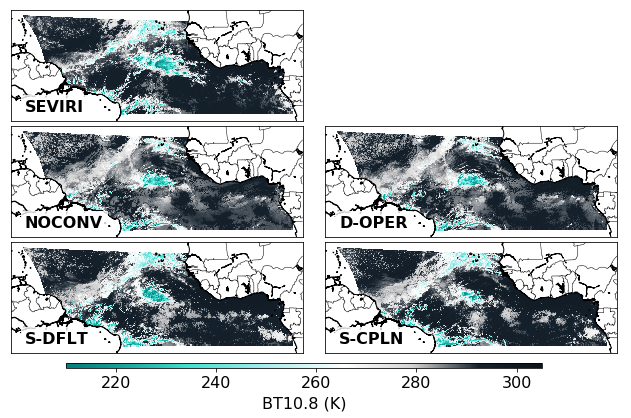

In [66]:
fig, axs = pl.subplots( nrows = 3, ncols = 2, figsize = (11, 7), sharex = True, sharey = True )
axs = axs.flatten()

labs = labels
color = 'gold'
cmap = tropy.plotting_tools.colormaps.nice_cmaps('ocean-clouds')

x,y = m( b108stack[basename]['lon'], b108stack[basename]['lat'])

sorted_fnames = list ( sorted_fnames )
if not 'empty' in sorted_fnames:
    sorted_fnames.insert(1, 'empty')
    labs.insert(1, 'empty')

for i, basename in enumerate( sorted_fnames ):
    
    if basename == 'empty':
        axs[i].axis('off')
        continue

    pl.sca( axs[i] )
    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh( x, y, b108stack[basename]['bt108'], cmap = cmap, vmin = 210, vmax = 305 )
    m.drawlsmask(ocean_color = [0,0,0,0], land_color = 'white', zorder = 1)

    axs[i].text(4.3e5, 2e5,  labs[i], va = 'bottom', ha = 'left', fontweight = 'bold' , 
                      bbox = dict(facecolor='white', edgecolor = 'white', alpha=0.8))

#    if i >= 0:
#        break
        

pl.subplots_adjust( hspace = 0.05, wspace = 0.05, bottom = 0.2)

clabs = [np.arange(200,320,20), np.arange(200,270,10)]

apos = axs[-1].get_position()
cax = fig.add_axes([0.2, apos.y0 - 0.03, 0.6, 0.01])
cbar = pl.colorbar(axs[0].collections[-1], cax, orientation = 'horizontal', ticks = clabs[0], )
pl.figtext(0.5, 0.1, 'BT10.8 (K)', ha = 'center', va = 'center')

pl.savefig('../pics/overview_BT108_natcol_%s.jpg' % version, dpi = 300)

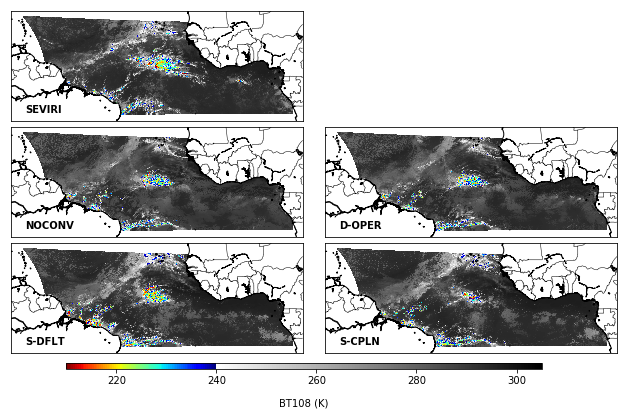

In [21]:
fig, axs = pl.subplots( nrows = 3, ncols = 2, figsize = (11, 7), sharex = True, sharey = True )
axs = axs.flatten()

labs = labels
color = 'gold'
cmap = tropy.plotting_tools.colormaps.enhanced_colormap(vmin = 210, vmed = 240, vmax = 305)

x,y = m( b108stack[basename]['lon'], b108stack[basename]['lat'])

sorted_fnames = list ( sorted_fnames )
if not 'empty' in sorted_fnames:
    sorted_fnames.insert(1, 'empty')
    labs.insert(1, 'empty')

for i, basename in enumerate( sorted_fnames ):
    
    if basename == 'empty':
        axs[i].axis('off')
        continue

    pl.sca( axs[i] )
    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh( x, y, b108stack[basename]['bt108'], cmap = cmap, vmin = 210, vmax = 305 )
    m.drawlsmask(ocean_color = [0,0,0,0], land_color = 'white', zorder = 1)

    axs[i].text(4.3e5, 2e5,  labs[i], va = 'bottom', ha = 'left', fontweight = 'bold' , 
                      bbox = dict(facecolor='white', edgecolor = 'white', alpha=0.8))

#    if i >= 0:
#        break
        

pl.subplots_adjust( hspace = 0.05, wspace = 0.05, bottom = 0.2)

clabs = [np.arange(200,320,20), np.arange(200,270,10)]

apos = axs[-1].get_position()
cax = fig.add_axes([0.2, apos.y0 - 0.03, 0.6, 0.01])
cbar = pl.colorbar(axs[0].collections[-1], cax, orientation = 'horizontal', ticks = clabs[0], )
pl.figtext(0.5, 0.1, 'BT108 (K)', ha = 'center', va = 'center')

pl.savefig('../pics/overview_BT108_col-enhanced.jpg', dpi = 300)

## Plotting a Channel Overview for a selected Experiment

### Get Exp List

In [22]:
fdir = '%s/icon/hdcp2_atlantic_stochconv_main_experiments' % local_data_path
flist = sorted( glob.glob( '%s/[sm]*-hdcp2_atlantic*nc' % fdir) )
flist

['/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv_main_experiments/msevi-hdcp2_atlantic-20131220.nc',
 '/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv_main_experiments/synsat-hdcp2_atlantic_detconv.nc',
 '/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv_main_experiments/synsat-hdcp2_atlantic_noconv.nc',
 '/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv_main_experiments/synsat-hdcp2_atlantic_stochconv-vervel_-00.nc',
 '/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv_main_experiments/synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc']

### Chosse Exp

In [23]:
fname = flist[-1]

### Open Data

In [24]:
dset = xr.open_dataset( fname )

### Rewrite Time Vector

In [25]:
import nawdex_analysis.io.tools
time_vector = nawdex_analysis.io.tools.convert_timevec( dset.time.data )
dset['time'] = time_vector

In [26]:
dset

<xarray.Dataset>
Dimensions:        (cols: 2050, ndim: 2, rows: 900, time: 24)
Coordinates:
    lat            (rows, cols) float64 ...
    lon            (rows, cols) float64 ...
  * time           (time) datetime64[ns] 2013-12-20 ... 2013-12-21
Dimensions without coordinates: cols, ndim, rows
Data variables:
    bt120          (time, rows, cols) float32 ...
    msevi_region   (ndim, ndim) int64 ...
    bt134          (time, rows, cols) float32 ...
    zen            (rows, cols) float64 ...
    nwcsaf_region  (ndim, ndim) int64 ...
    bt087          (time, rows, cols) float32 ...
    bt108          (time, rows, cols) float32 ...
    bt073          (time, rows, cols) float32 ...
    bt062          (time, rows, cols) float32 ...
Attributes:
    description:  Synthetic Infrared MSG-SEVIRI images from the Prime Service
    title:        Synthetic MSG-SEVIRI Brightness Temperatures
    institution:  Leibniz Institute for Tropospheric Research
    author:       Fabian Senf (senf@tropos.de

### Select Time

In [27]:
d = dset.sel( time = time)
d

<xarray.Dataset>
Dimensions:        (cols: 2050, ndim: 2, rows: 900)
Coordinates:
    lat            (rows, cols) float64 ...
    lon            (rows, cols) float64 ...
    time           datetime64[ns] 2013-12-20T16:00:00
Dimensions without coordinates: cols, ndim, rows
Data variables:
    bt120          (rows, cols) float32 ...
    msevi_region   (ndim, ndim) int64 ...
    bt134          (rows, cols) float32 ...
    zen            (rows, cols) float64 ...
    nwcsaf_region  (ndim, ndim) int64 ...
    bt087          (rows, cols) float32 ...
    bt108          (rows, cols) float32 ...
    bt073          (rows, cols) float32 ...
    bt062          (rows, cols) float32 ...
Attributes:
    description:  Synthetic Infrared MSG-SEVIRI images from the Prime Service
    title:        Synthetic MSG-SEVIRI Brightness Temperatures
    institution:  Leibniz Institute for Tropospheric Research
    author:       Fabian Senf (senf@tropos.de)

### Make a BT List

In [28]:
btlist = []
for k in sorted( d.keys() ):
    if 'bt' in k:
        btlist +=[ k ]
btlist

[u'bt062', u'bt073', u'bt087', u'bt108', u'bt120', u'bt134']

### Plotting

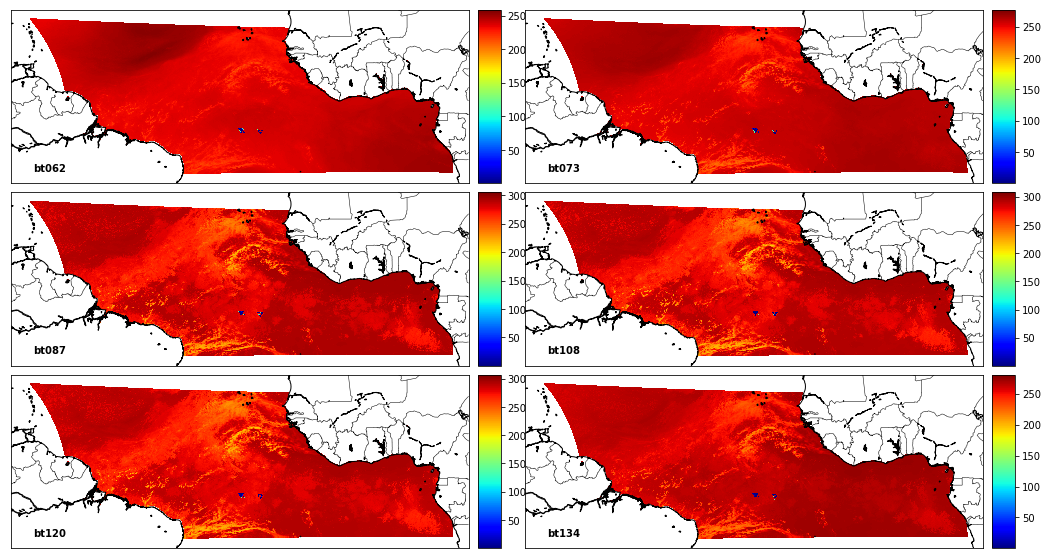

In [29]:
fig, axs = pl.subplots( nrows = 3, ncols = 2, figsize = (18, 11), sharex = True, sharey = True )
axs = axs.flatten()

labs = labels
color = 'gold'
cmap = pl.cm.jet #tropy.plotting_tools.colormaps.nice_cmaps('ocean-clouds')

x,y = m( d['lon'].data, d['lat'].data)

for i, btname in enumerate( btlist ):
    
    pl.sca( axs[i] )
    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh( x, y, d[btname], cmap = cmap)
    m.colorbar()
    m.drawlsmask(ocean_color = [0,0,0,0], land_color = 'white', zorder = 1)

    axs[i].text(4.3e5, 2e5,  btname, va = 'bottom', ha = 'left', fontweight = 'bold' , 
                      bbox = dict(facecolor='white', edgecolor = 'white', alpha=0.8))

#    if i >= 0:
#        break
        

pl.subplots_adjust( hspace = 0.05, wspace = 0.05, bottom = 0.2)


Okay, there are some weird pixel values inside!

## NN Interpolation for Missing Values

In [30]:
( d['bt062'] < 160 ).sum()

<xarray.DataArray 'bt062' ()>
array(343)
Coordinates:
    time     datetime64[ns] 2013-12-20T16:00:00

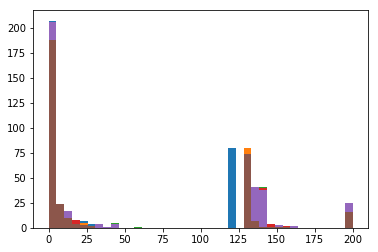

In [31]:
for bt in btlist:
    pl.hist( d[bt].data.flatten(), np.linspace(0, 200, 40) )

In [32]:
dma = d['bt108'].where( d['bt108'] > 180 )

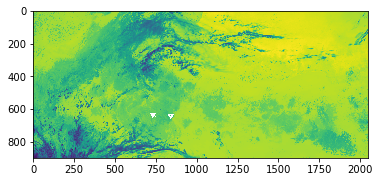

In [33]:
pl.imshow( dma )

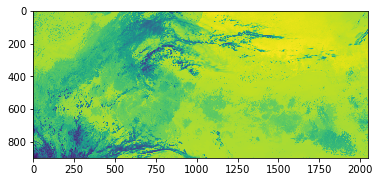

In [34]:
pl.imshow( dma.interpolate_na( dim = 'rows', method = 'nearest' ) )

In [35]:
dset.close()

## Interpolation the Full Field

In [36]:
fdir = '%s/icon/hdcp2_atlantic_stochconv/' % local_data_path
fname = '%s/synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc' % fdir
dset = xr.open_dataset( fname )

In [37]:
dset_interp = dset.copy()

for btname in btlist:
    dma = dset[btname].where( dset[btname] > 180 )
    dset_interp[btname][:] = dma.interpolate_na( dim = 'rows', method = 'nearest' ) 

In [38]:
newname = fname.replace('.nc', '_interp.nc')
newname

'/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv//synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth_interp.nc'

In [39]:
dset_interp.to_netcdf( newname )

## Patching the Full Field

In [40]:
fdir = '%s/icon/hdcp2_atlantic_stochconv/' % local_data_path
fname = '%s/synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc' % fdir
dset = xr.open_dataset( fname )

In [41]:
d =  dset.isel(time = 12, cols = 1000, rows = 500) 

for vname in btlist :
    print vname, d[vname].data

bt062 239.11
bt073 260.0
bt087 287.0
bt108 288.32
bt120 286.01
bt134 268.74


In [42]:
dset_patch = dset.copy()

for btname in btlist:
    dset_patch[btname][:] = d[btname].data

In [43]:
newname = fname.replace('.nc', '_patch.nc')
newname

'/vols/fs1/store/senf/data/icon/hdcp2_atlantic_stochconv//synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth_patch.nc'

In [44]:
dset_patch.to_netcdf( newname )